การบ้านครั้งสุดท้ายนี้ให้เขียนโปรแกรมการจำลองการระบาด กำหนดให้ข้อมูลของคนหนึ่งคนเก็บใน dictionary ดังนี้ 

1.   `id` เป็นจำนวนเต็มเก็บเลขประจำตัวของคน
2.   `vaccinated` เป็นบูลีน แทนสถานะการรับฉีดวัคซีนว่าได้รับ (`True`) หรือยังไม่ได้รับ (`False`)
3.   `coordinate` เป็นทูเปิลของจำนวนจริง 2 ค่า เก็บพิกัดในแนวแกน `x` และ `y` ของคนนั้น

เช่น `{'id':20382921, 'vaccinated':False, 'coodinate': (204.368, 304.256)}` หมายถึง คนนี้มีเลขประจำตัว `20382921` ยังไม่ได้รับการฉีดวัคซีน และอยู่ที่พิกัด `x=204.368` และ `y=304.256`

และเก็บข้อมูลประชากรเป็น list of dicts เช่น 

```
[{'id':20382921, 'vaccinated':False, 'coodinate': (204.368, 304.256)}, 
 {'id':20382952, 'vaccinated':True, 'coodinate': (201.280, 302.524)},
 {'id':20482912, 'vaccinated':False, 'coodinate': (202.102, 301.129)}]
 ```

สั่ง run cell ข้างล่างนี้เพื่อสร้างข้อมูลประชากร (แบบสุ่ม) เก็บในตัวแปร `population` (`n` คือขนาดประชากร และ `vaccinated` คือเปอร์เซ็นต์ของประชากรที่ได้รับวัคซีน)



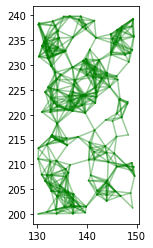

In [44]:
#@title
n = 1000 #@param {type:"slider", min:100, max:1000, step:1}
vaccinated_percent = 81 #@param {type:"slider", min:0, max:100, step:1}

import random 
random.seed(37)
population = [{'id':int(random.random()*(10**8-10**7))+10**7,\
          'vaccinated': True if random.random()<vaccinated_percent/100 else False,\
          'coordinate':(random.random()*20+130,random.random()*40+200)} for i in range(n)]
show_data(get_all_unjabbed_pairs(population, 4), get_coordinates(population, False))

--- 
## การส่งงาน
  * Save a copy in Drive 
  * เปลี่ยนชื่อ Notebook ให้เป็น HW5_xxxxxxxxxx.ipynb โดย xxxxxxxxxx เป็นเลขประจำตัวนิสิต 
  * File -> Download -> Download .ipynb
  * ส่งไฟล์ที่ดาวน์โหลดได้ใน MyCourseVille ก่อนเวลา <font color=red>**23:59 น. วันที่ 8 พฤศจิกายน 2565**</font> 
  * จะตรวจแฟ้ม .ipynb แฟ้มล่าสุดที่ส่งในระบบ MyCourseVille เท่านั้น

<hr>

## <font color=red>สำคัญ: อ่านตรงนี้ด้วย</font>
- ข้อห้าม
 - ห้าม import ใด ๆ 
 - ห้ามเปลี่ยนบรรทัด def ของฟังก์ชันที่ให้เขียน
 - ในกรณีที่ฟังก์ชันมีการคืนค่า ฟังก์ชันต้องคืนข้อมูลและประเภทข้อมูลตามที่กำหนดเท่านั้น
 - ห้ามเปลี่ยนบรรทัดแรกของ code cell
- ส่งแฟ้ม .ipynb กี่ครั้งก็ได้ แต่จะตรวจแฟ้ม .ipynb **แฟ้มล่าสุด** เท่านั้น
- <font color=red>ส่อทุจริต</font> เช่น
  - ส่งโปรแกรมที่ผู้ส่งไม่สามารถอธิบายได้ว่า ใช้หลักการและทำงานอย่างไร
  - หรือ ส่งโปรแกรมที่คล้ายกับโปรแกรมของผู้อื่นมาก ๆ (ไม่ว่าจะเป็นผู้ให้หรือผู้รับ จะตั้งใจหรือไม่ก็ตาม)
  - ฉะนั้น
    - ให้แน่ใจว่า ไม่ดูโปรแกรมของคนอื่น
    - ให้แน่ใจว่า ไม่ได้ให้คนอื่นดูโปรแกรมของตัวเอง

- หากพบว่า งานที่ส่งส่อทุจริต จะได้นิสิตจะได้ $0$ ใน<font color=red>การบ้านครั้งนี้ และการบ้านครั้งที่แล้ว ๆ</font>
- จะตรวจให้คะแนน เมื่อ
 - แฟ้มที่ส่งครั้งหลังสุดใน MyCourseVille เป็นแฟ้มที่ตั้งชื่อตามที่กำหนด และเป็นแฟ้มที่ได้จากการ File->Download->Download .ipynb เท่านั้น (ไม่ใช่แฟ้ม .py แล้วมา rename เป็น .ipynb)
 - ฟังก์ชันที่เขียนส่งต้องอยู่ใน code cell สุดท้ายข้างล่างนี้
 - บรรทัดแรกของ code cell ทุกอันต้องขึ้นต้นด้วย `# HW5_Infection_Analysis` ตามที่ให้ไป
 - ไม่ทำในสิ่งที่ห้ามทำในข้อห้าม
 - code cell ทุกอันสามารถทำงานได้ (ไม่มี error)

---

# งานที่ 1 (5 คะแนน)

เขียนฟังก์ชัน `get_coordinates(population, vaccinated)` 
- รับ `population` เป็น list of dicts  ที่เก็บข้อมูลประชากร
- รับ `vaccinated` เป็นบูลีน เพื่อเลือกว่าจะคืนค่าเป็นประชากรที่ได้รับ (`True`) หรือไม่ได้รับวัคซีน (`False`)
- คืน dict ที่มีเลขประจำตัวเป็น key และพิกัดเป็น value 

เช่น

```
population = [
    {'id': 71380410,
    'vaccinated': True,
    'coordinate': (142.35632697722804, 233.67679618203823)},
    {'id': 85109525,
    'vaccinated': False,
    'coordinate': (142.62075930591354, 214.76919336251675)},
    {'id': 57521675,
    'vaccinated': False,
    'coordinate': (143.65899867666593, 224.0267344699912)},
    {'id': 35373207,
    'vaccinated': False,
    'coordinate': (144.72263074267343, 217.75509778988294)},
    {'id': 96365445,
    'vaccinated': False,
    'coordinate': (146.76725209497084, 203.64110005292503)}
]
```
```
get_coordinates(population, False) จะคืนค่า 
{85109525: (142.62075930591354, 214.76919336251675),
 57521675: (143.65899867666593, 224.0267344699912),
 35373207: (144.72263074267343, 217.75509778988294),
 96365445: (146.76725209497084, 203.64110005292503)}
```

In [36]:
# HW5_Infection_Analysis

def get_coordinates(population, vaccinated):
    d = {}
    for i in population :
        d_id = i
        if d_id['vaccinated'] == vaccinated :
            idp = d_id['id']
            cor = d_id['coordinate']
            d[idp] = cor
    return  d

# งานที่ 2 (5 คะแนน)

เขียนฟังก์ชัน `get_all_unjabbed_pairs(population, radius)`
- รับ `population` เป็น list of dicts เก็บข้อมูลประชากร `radius` เป็น float เก็บรัศมีการระบาด 
- คืน list of tuples  (`id1`, `id2`)  โดยที่ ทั้งสองเลขประจำตัวยังไม่ได้รับวัคซีน และอยู่ห่างกันไม่เกิน `radius`
- ให้เรียงลิสต์ที่คืนตามทูเปิลของเลขประจำตัวจากน้อยไปมาก โดยให้แต่ละทูเปิลเก็บเลขประจำตัวช่องซ้ายให้มีค่าน้อยกว่าช่องขวา

เช่น
```
population = [
    {'id': 71380410,
    'vaccinated': True,
    'coordinate': (142.35632697722804, 233.67679618203823)},
    {'id': 85109525,
    'vaccinated': False,
    'coordinate': (142.62075930591354, 214.76919336251675)},
    {'id': 57521675,
    'vaccinated': False,
    'coordinate': (143.65899867666593, 224.0267344699912)},
    {'id': 35373207,
    'vaccinated': False,
    'coordinate': (144.72263074267343, 217.75509778988294)},
    {'id': 96365445,
    'vaccinated': False,
    'coordinate': (146.76725209497084, 203.64110005292503)}
]
```
```
get_all_unjabbed_pairs(population, 10) จะคืนค่า
[(35373207, 57521675), (35373207, 85109525), (57521675, 85109525)]
```

In [37]:
# HW5_Infection_Analysis
def sort_l(l):
    li = []
    lis = []
    for i in l:
        lis.append(i[0])
    lis.sort()
    for i in lis :
        for j in l :
            if j[0] == i:
                li.append(j)
    return li

def unget_coordinates(population):
    vaccinated = False
    d = []
    for i in population :
        d_id = i
        if d_id['vaccinated'] == vaccinated :
            idp = d_id['id']
            cor = d_id['coordinate']
            d.append([idp,cor])
    d = sort_l(d)
    return  d

def distance (c1,c2):
    x1 = c1[0]
    x2 = c2[0]
    y1 = c1[1]
    y2 = c2[1]
    d = ( ( (x1-x2)**2 )+( (y1-y2)**2 ) )**(0.5)
    return d

def get_all_unjabbed_pairs(population, radius):
    unget = unget_coordinates(population) # [ [id,(x,y)] , [] ]
    get_all = []
    for i in range(len(unget)) :
        for j in range(len(unget)):
            if j <= i :
                pass
            else :
                p1 = unget[i]
                p2 = unget[j]
                id1 = p1[0]
                id2 = p2[0]               
                c1 = p1[1]
                c2 = p2[1]
                if distance(c1,c2) <= radius :
                    if int(id1) > int(id2):
                        id1 ,id2 = id2 , id1
                    get_all.append((id1,id2))
    return get_all

# งานที่ 3 (10 คะแนน)

เขียนฟังก์ชัน `first_hop(population, id, radius)` 
- รับ `population` เป็น list of dicts เก็บข้อมูลประชากร `id` เป็นจำนวนเต็ม เก็บเลขประจำตัว และ`radius` เป็น float เก็บรัศมีการระบาด 
- คืน list of เลขประจำตัวต่าง ๆ ที่ยังไม่ได้รับวัคซีน และอยู่ห่างจากคนที่เลขประจำตัว `id` ในระยะไม่เกิน `radius`
- โดยให้เรียงลิสต์ที่คืนตามเลขประจำตัวจากน้อยไปมาก (หากไม่มีข้อมูลอะไรคืนเลย ก็คืนลิสต์ว่าง)

เช่น
```
population = [
    {'id': 71380410,
    'vaccinated': True,
    'coordinate': (142.35632697722804, 233.67679618203823)},
    {'id': 85109525,
    'vaccinated': False,
    'coordinate': (142.62075930591354, 214.76919336251675)},
    {'id': 57521675,
    'vaccinated': False,
    'coordinate': (143.65899867666593, 224.0267344699912)},
    {'id': 35373207,
    'vaccinated': False,
    'coordinate': (144.72263074267343, 217.75509778988294)},
    {'id': 96365445,
    'vaccinated': False,
    'coordinate': (146.76725209497084, 203.64110005292503)}
]
```
```
first_hop(population, 85109525, 10) จะคืนค่า
[35373207, 57521675]
```

In [38]:
# HW5_Infection_Analysis
def sort_l(l):
    li = []
    lis = []
    for i in l:
        lis.append(i[0])
    lis.sort()
    for i in lis :
        for j in l :
            if j[0] == i:
                li.append(j)
    return li

def unget_coordinates(population):
    vaccinated = False
    d = []
    for i in population :
        d_id = i
        if d_id['vaccinated'] == vaccinated :
            idp = d_id['id']
            cor = d_id['coordinate']
            d.append([idp,cor])
    d = sort_l(d)
    return  d

def distance (c1,c2):
    x1 = c1[0]
    x2 = c2[0]
    y1 = c1[1]
    y2 = c2[1]
    d = ( ( (x1-x2)**2 )+( (y1-y2)**2 ) )**(0.5)
    return d

def get_all_unjabbed_pairs(population, radius):
    unget = unget_coordinates(population) # [ [id,(x,y)] , [] ]
    get_all = []
    for i in range(len(unget)) :
        for j in range(len(unget)):
            if j <= i :
                pass
            else :
                p1 = unget[i]
                p2 = unget[j]
                id1 = p1[0]
                id2 = p2[0]               
                c1 = p1[1]
                c2 = p2[1]
                if distance(c1,c2) <= radius :
                    if int(id1) > int(id2):
                        id1 ,id2 = id2 , id1
                    get_all.append((id1,id2))
    return get_all

def first_hop(population, idp, radius):
    get = []
    get_all = get_all_unjabbed_pairs(population, radius)
    for i in get_all:
        if idp in i :
            for j in i:
                if j != idp:
                    get.append(j)
    return get

# งานที่ 4 (10 คะแนน)

เขียนฟังก์ชัน `get_adjacency_set(pairs)` 
- รับ `pairs` เป็น list of tuples ซึ่งเก็บข้อมูลในรูปแบบเดียวกับผลที่ได้จากฟังก์ชัน `get_all_unjabbed_pairs` ในงานที่ 2
- คืน dict ที่มีเลขประจำตัวทุกหมายเลขใน `pairs` เป็น key โดยที่ value เป็น set ของเลขประจำตัวต่าง ๆ ที่อยู่ในทูเปิลเดียวกับค่า key เช่น


เช่น
```
pairs = [
    (35373207, 57521675), 
    (35373207, 85109525), 
    (57521675, 85109525)
]
```
```
get_adjacency_set(pairs) จะคืนค่า 
{35373207: {57521675, 85109525}, 57521675: {85109525, 35373207}, 85109525: {57521675, 35373207}}
```

```
get_adjacency_set([(1,2),(1,3),(2,4),(4,5),(7,8)]) จะคืนค่า
{1: {2, 3}, 2: {1, 4}, 3: {1}, 4: {2, 5}, 5: {4}, 7: {8}, 8: {7}}
```

In [39]:
# HW5_Infection_Analysis

def get_adjacency_set(pairs):
    gset = {}
    for i in pairs:
        p = i[0]
        q = i[1]
        if p not in gset:
            gset[p] = {q}
        else :
            gset[p].add(q)
            
        if q not in gset:
            gset[q] = {p}
        else :
            gset[q].add(p)
    return gset


# งานที่ 5 (15 คะแนน)

เขียนฟังก์ชัน `get_infectable_ids(pairs, seed)` 
- รับ `pairs` เป็น list of tuples ซึ่งเก็บข้อมูลในรูปแบบเดียวกับผลที่ได้จากฟังก์ชัน `get_all_unjabbed_pairs` ในงานที่ 2 และ `seed` เป็นจำนวนเต็มเก็บเลขประจำตัว
- คืน set ที่เก็บเลขประจำตัวต่าง ๆ ที่โรคสามารถระบาดไปถึงได้ ถ้า `seed` เป็นจุดเริ่มต้นของการระบาด
- ให้ใช้ flowchart ด้านล่างนี้เป็นแนวทางการทำงาน รวมถึงการใช้ฟังก์ชันก่อนหน้านี้มาช่วยในการเขียนฟังก์ชั้นนี้

<img src='https://www.mycourseville.com/sites/all/modules/courseville/files/ckfinder/userfiles/100006056910939/files/2565_1_HW05_connected_ID_6360c23b59ee6.png' width=250px>

เช่น หากคู่เลขประจำตัวต่าง ๆ ที่ยังไม่ได้รับวัคซีน และสามารถแพร่เชื้อถึงกันได้ เป็นดังนี้ 
```
pairs = [(1,2),(1,3),(2,4),(4,5),(7,8)]
```
<img src='https://www.mycourseville.com/sites/all/modules/courseville/files/ckfinder/userfiles/100006056910939/files/2565_1_HW05_adj_id_6360ca4858fb3.png'>

เมื่อเรียก `get_adjacency_set(pairs)` จะได้ dict
```
{1: {2, 3}, 2: {1, 4}, 3: {1}, 4: {2, 5}, 5: {4}, 7: {8}, 8: {7}}
```
ที่ทำให้หาได้รวดเร็วว่า เลขประจำตัวใดบ้างที่สามารถรับเชื้อได้จากเลขประจำตัวที่เป็นคีย์ 

จะได้ว่า 
```
get_infectable_ids(pairs, 2) จะคืนค่า {1, 2, 3, 4, 5}
```


หมายเหตุ: ตรงส่วนที่เขียนใน flowchart ว่า `append all adjacent ids, which is not in output, of p into f` หมายความว่า ให้ append เลขประจำตัวทั้งหมดที่เชื่อมกับ `p` ลงในลิสต์ `f` โดยต้องเป็นเลขประจำตัวที่ไม่อยู่ใน `output`

เช่น ถ้า `p` เก็บค่า 2 ให้นำ 1 กับ 4 (เฉพาะหมายเลขที่ไม่มีมีใน output) ไปเพิ่มต่อท้ายใน `f` 

ผลลัพธ์ที่ได้จาก flowchart จะเป็นลิสต์ที่เก็บอยู่ในตัวแปร `output` 

In [40]:
# HW5_Infection_Analysis

def get_adjacency_set(pairs):
    gset = {}
    for i in pairs:
        p = i[0]
        q = i[1]
        if p not in gset:
            gset[p] = {q}
        else :
            gset[p].add(q)
            
        if q not in gset:
            gset[q] = {p}
        else :
            gset[q].add(p)
    return gset

def get_infectable_ids(pairs,seed):
    ginf = set()
    gset = get_adjacency_set(pairs)
    f = list(gset[seed])
    while f != []:
        for k in f :
            for i in gset[k] :
                if i not in f and i not in ginf:
                    f.append(i)
        p = f.pop(0)
        ginf.add(p)
    return ginf

# งานที่ 6 (15 คะแนน)

เขียนฟังก์ชัน `get_all_clusters(pairs)` 
- รับ `pairs` เป็น list of tuples ซึ่งเก็บข้อมูลในรูปแบบเดียวกับผลที่ได้จากฟังก์ชัน `get_all_unjabbed_pairs` ในงานที่ 2
- คืน list of sets แทนกลุ่มก้อนการระบาดในแต่ละกลุ่ม แต่ละ set แทนกลุ่มการระบาด  

ตัวอย่างเช่น 

หาก `pairs=[(1,2),(1,3),(2,4),(4,5),(7,8)]` 

`get_all_clusters(pairs)` จะคืนค่า `[{1, 2, 3, 4, 5}, {7, 8}]`


In [41]:
# HW5_Infection_Analysis

def get_adjacency_set(pairs):
    gset = {}
    for i in pairs:
        p = i[0]
        q = i[1]
        if p not in gset:
            gset[p] = {q}
        else :
            gset[p].add(q)
            
        if q not in gset:
            gset[q] = {p}
        else :
            gset[q].add(p)
    return gset

def get_infectable_ids(pairs,seed):
    ginf = set()
    gset = get_adjacency_set(pairs)
    f = list(gset[seed])
    while f != []:
        for k in f :
            for i in gset[k] :
                if i not in f and i not in ginf:
                    f.append(i)
        p = f.pop(0)
        ginf.add(p)
    return ginf
        
def get_all_clusters(pairs):
    pinf = set()
    for i in pairs:
        for j in i:
            if j not in pinf:
                pinf.add(j)
    clt = []
    while pinf != set():
        p = pinf.pop()
        ginf = get_infectable_ids(pairs,p)
        clt.append(ginf)
        for i in ginf:
            pinf.discard(i)
    return clt


### ลองเล่น ๆ ###

หากเขียนฟังก์ชัน 1 และ 2 ถูกต้อง (ไม่เกี่ยวกับการเรียงลำดับ) เมื่อสั่ง run เซลล์ด้านล่างนี้ จะได้รูปที่แสดงเส้นเชื่อมของคู่คนที่ยังไม่ได้รับวัคซีน ดังตัวอย่างรูปด้านล่าง

<img src='https://www.mycourseville.com/sites/all/modules/courseville/files/ckfinder/userfiles/100006056910939/files/2565_1_HW05_sample_6360c26284b61.png'>

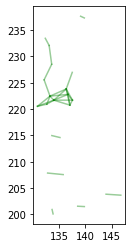

In [42]:
#@title
n = 1000 #@param {type:"slider", min:100, max:1000, step:1}
vaccinated_percent = 97 #@param {type:"slider", min:0, max:100, step:1}

import random 
random.seed(37)
import matplotlib.pyplot as plt 

def show_data(pairs,population_ids):
  fig,ax=plt.subplots()
  for pair in pairs:
    plt.plot([population_ids[pair[0]][0],population_ids[pair[1]][0]],
            [population_ids[pair[0]][1],population_ids[pair[1]][1]],'g',alpha=0.4)
  ax.set_aspect('equal', 'box')
  plt.show()

population = [{'id':int(random.random()*(10**8-10**7))+10**7,\
          'vaccinated': True if random.random()<vaccinated_percent/100 else False,\
          'coordinate':(random.random()*20+130,random.random()*40+200)} for i in range(n)]
show_data(get_all_unjabbed_pairs(population, 4), get_coordinates(population, False))